In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from src.iterative_methods import gauss_jacobi
from src.iterative_methods import gauss_seidel

[01-25 19:28:19][INFO] 2025-01-25 19:28:19.698943
[01-25 19:28:20][INFO] 2025-01-25 19:28:20.138596


# Gauss-Jacobi y Gauss-Seidel

## 1. Divergencia

Se plantea un ejemplo de divergencia con los métodos Gauss-Jacobi y Gauss-Seidel dada una matriz que no cumple con el teorema de la Diagonal Estrictamente Dominante.

In [4]:
import numpy as np
A = np.array([[2, 10], [3, 2]])
b = np.array([16, 11])
x0 = np.array([1, 1])
tol = 1e-10
max_iter = 21

In [5]:
import matplotlib.pyplot as plt

[01-25 19:28:21][INFO] i= 0 x: [1 1]
[01-25 19:28:21][INFO] i= 1 x: [[3. 4.]]
[01-25 19:28:21][INFO] i= 2 x: [[-12.   1.]]
[01-25 19:28:21][INFO] i= 3 x: [[ 3.  23.5]]
[01-25 19:28:21][INFO] i= 4 x: [[-109.5    1. ]]
[01-25 19:28:21][INFO] i= 5 x: [[  3.   169.75]]
[01-25 19:28:21][INFO] i= 6 x: [[-840.75    1.  ]]
[01-25 19:28:21][INFO] i= 7 x: [[   3.    1266.625]]
[01-25 19:28:21][INFO] i= 8 x: [[-6.325125e+03  1.000000e+00]]
[01-25 19:28:21][INFO] i= 9 x: [[3.0000000e+00 9.4931875e+03]]
[01-25 19:28:21][INFO] i= 10 x: [[-4.74579375e+04  1.00000000e+00]]
[01-25 19:28:21][INFO] i= 11 x: [[3.00000000e+00 7.11924062e+04]]
[01-25 19:28:21][INFO] i= 12 x: [[-3.55954031e+05  1.00000000e+00]]
[01-25 19:28:21][INFO] i= 13 x: [[3.00000000e+00 5.33936547e+05]]
[01-25 19:28:21][INFO] i= 14 x: [[-2.66967473e+06  1.00000000e+00]]
[01-25 19:28:21][INFO] i= 15 x: [[3.0000000e+00 4.0045176e+06]]
[01-25 19:28:21][INFO] i= 16 x: [[-2.002258e+07  1.000000e+00]]
[01-25 19:28:21][INFO] i= 17 x: [[3.0000

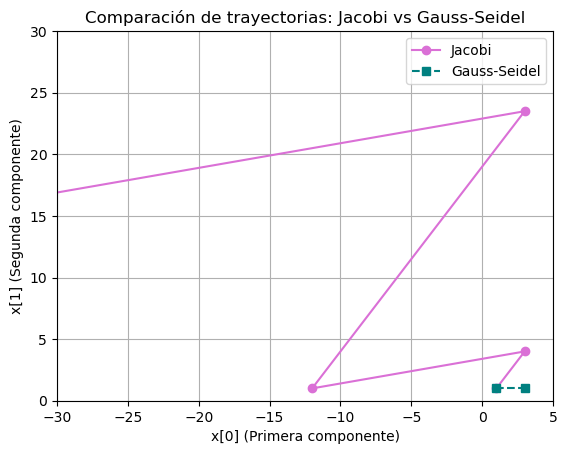

In [6]:
x_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
x_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

tray_jacobi_array = np.hstack([x.reshape(-1, 1) for x in tray_jacobi])
tray_seidel_array = np.hstack([x.reshape(-1, 1) for x in tray_seidel])
# Verificar que ambas soluciones tengan al menos dos variables
if tray_jacobi_array.shape[0] < 2 or tray_seidel_array.shape[0] < 2:
    raise ValueError("Ambas soluciones deben tener al menos dos variables para graficar x vs y.")
# Extraer los valores de x[0] y x[1] para cada método
x_jacobi_vals = tray_jacobi_array[0, :]
y_jacobi_vals = tray_jacobi_array[1, :]
x_seidel_vals = tray_seidel_array[0, :]
y_seidel_vals = tray_seidel_array[1, :]
# Graficar las trayectorias
plt.plot(x_jacobi_vals, y_jacobi_vals, marker="o", linestyle="-", color="orchid", label="Jacobi")
plt.plot(x_seidel_vals, y_seidel_vals, marker="s", linestyle="--", color="teal", label="Gauss-Seidel")
# Personalizar la gráfica
plt.xlabel("x[0] (Primera componente)")
plt.ylabel("x[1] (Segunda componente)")
plt.xlim(-30, 5)
plt.ylim(0, 30)
plt.title("Comparación de trayectorias: Jacobi vs Gauss-Seidel")
plt.legend()
plt.grid()
plt.show()


## 2. Convergencia

Para lograr la convergencia en el ejemplo anterior, se realiza un cambio de filas para lograr el teorema de la Diagonal Estrictamente Dominante.

### Ejemplo de Convergencia con estimación inicial: [1,1]

In [7]:
import numpy as np
A = np.array([[3, 2], [2, 10] ])
b = np.array([11, 16])
x = np.array([1, 1])

[01-25 19:28:21][INFO] i= 0 x: [1 1]
[01-25 19:28:21][INFO] i= 1 x: [[3.  1.4]]
[01-25 19:28:21][INFO] i= 2 x: [[2.73333333 1.        ]]
[01-25 19:28:21][INFO] i= 3 x: [[3.         1.05333333]]
[01-25 19:28:21][INFO] i= 4 x: [[2.96444444 1.        ]]
[01-25 19:28:21][INFO] i= 5 x: [[3.         1.00711111]]
[01-25 19:28:21][INFO] i= 6 x: [[2.99525926 1.        ]]
[01-25 19:28:21][INFO] i= 7 x: [[3.         1.00094815]]
[01-25 19:28:21][INFO] i= 8 x: [[2.9993679 1.       ]]
[01-25 19:28:21][INFO] i= 9 x: [[3.         1.00012642]]
[01-25 19:28:21][INFO] i= 10 x: [[2.99991572 1.        ]]
[01-25 19:28:21][INFO] i= 11 x: [[3.         1.00001686]]
[01-25 19:28:21][INFO] i= 12 x: [[2.99998876 1.        ]]
[01-25 19:28:21][INFO] i= 13 x: [[3.         1.00000225]]
[01-25 19:28:21][INFO] i= 14 x: [[2.9999985 1.       ]]
[01-25 19:28:21][INFO] i= 15 x: [[3.        1.0000003]]
[01-25 19:28:21][INFO] i= 16 x: [[2.9999998 1.       ]]
[01-25 19:28:21][INFO] i= 17 x: [[3.         1.00000004]]
[01-25 1

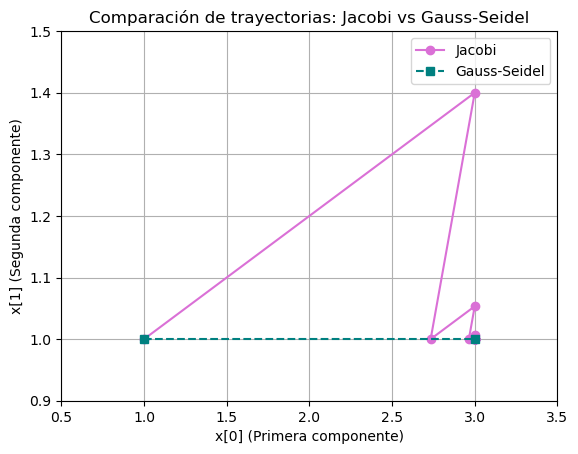

In [8]:
x_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x, tol=tol, max_iter=max_iter)
x_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x, tol=tol, max_iter=max_iter)

tray_jacobi_array = np.hstack([x.reshape(-1, 1) for x in tray_jacobi])
tray_seidel_array = np.hstack([x.reshape(-1, 1) for x in tray_seidel])
# Verificar que ambas soluciones tengan al menos dos variables
if tray_jacobi_array.shape[0] < 2 or tray_seidel_array.shape[0] < 2:
    raise ValueError("Ambas soluciones deben tener al menos dos variables para graficar x vs y.")
# Extraer los valores de x[0] y x[1] para cada método
x_jacobi_vals = tray_jacobi_array[0, :]
y_jacobi_vals = tray_jacobi_array[1, :]
x_seidel_vals = tray_seidel_array[0, :]
y_seidel_vals = tray_seidel_array[1, :]
# Graficar las trayectorias
plt.plot(x_jacobi_vals, y_jacobi_vals, marker="o", linestyle="-", color="orchid", label="Jacobi")
plt.plot(x_seidel_vals, y_seidel_vals, marker="s", linestyle="--", color="teal", label="Gauss-Seidel")
# Personalizar la gráfica
plt.xlabel("x[0] (Primera componente)")
plt.ylabel("x[1] (Segunda componente)")
plt.xlim(0.5, 3.5)
plt.ylim(0.9, 1.5)
plt.title("Comparación de trayectorias: Jacobi vs Gauss-Seidel")
plt.legend()
plt.grid()
plt.show()

### Ejemplo de convergencia con estimación inicial: [5, -2]

In [9]:
x0=np.array([5, -2])

[01-25 19:28:37][INFO] i= 0 x: [ 5 -2]
[01-25 19:28:37][INFO] i= 1 x: [[5.  0.6]]
[01-25 19:28:37][INFO] i= 2 x: [[3.26666667 0.6       ]]
[01-25 19:28:37][INFO] i= 3 x: [[3.26666667 0.94666667]]
[01-25 19:28:37][INFO] i= 4 x: [[3.03555556 0.94666667]]
[01-25 19:28:37][INFO] i= 5 x: [[3.03555556 0.99288889]]
[01-25 19:28:37][INFO] i= 6 x: [[3.00474074 0.99288889]]
[01-25 19:28:37][INFO] i= 7 x: [[3.00474074 0.99905185]]
[01-25 19:28:37][INFO] i= 8 x: [[3.0006321  0.99905185]]
[01-25 19:28:37][INFO] i= 9 x: [[3.0006321  0.99987358]]
[01-25 19:28:37][INFO] i= 10 x: [[3.00008428 0.99987358]]
[01-25 19:28:37][INFO] i= 11 x: [[3.00008428 0.99998314]]
[01-25 19:28:37][INFO] i= 12 x: [[3.00001124 0.99998314]]
[01-25 19:28:37][INFO] i= 13 x: [[3.00001124 0.99999775]]
[01-25 19:28:37][INFO] i= 14 x: [[3.0000015  0.99999775]]
[01-25 19:28:37][INFO] i= 15 x: [[3.0000015 0.9999997]]
[01-25 19:28:37][INFO] i= 16 x: [[3.0000002 0.9999997]]
[01-25 19:28:37][INFO] i= 17 x: [[3.0000002  0.99999996]]
[0

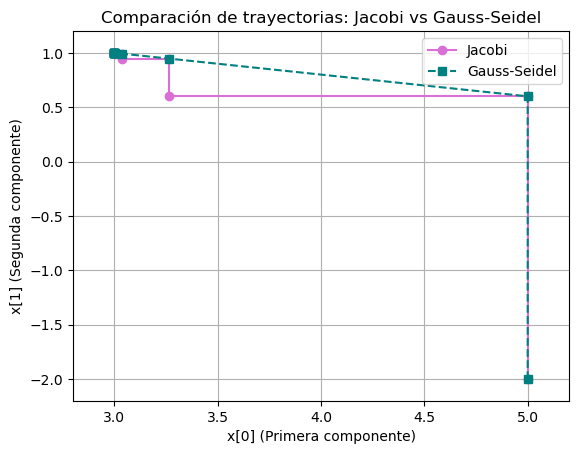

In [11]:
x_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=21)
x_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=13)

tray_jacobi_array = np.hstack([x.reshape(-1, 1) for x in tray_jacobi])
tray_seidel_array = np.hstack([x.reshape(-1, 1) for x in tray_seidel])
# Verificar que ambas soluciones tengan al menos dos variables
if tray_jacobi_array.shape[0] < 2 or tray_seidel_array.shape[0] < 2:
    raise ValueError("Ambas soluciones deben tener al menos dos variables para graficar x vs y.")
# Extraer los valores de x[0] y x[1] para cada método
x_jacobi_vals = tray_jacobi_array[0, :]
y_jacobi_vals = tray_jacobi_array[1, :]
x_seidel_vals = tray_seidel_array[0, :]
y_seidel_vals = tray_seidel_array[1, :]
# Graficar las trayectorias
plt.plot(x_jacobi_vals, y_jacobi_vals, marker="o", linestyle="-", color="orchid", label="Jacobi")
plt.plot(x_seidel_vals, y_seidel_vals, marker="s", linestyle="--", color="teal", label="Gauss-Seidel")
# Personalizar la gráfica
plt.xlabel("x[0] (Primera componente)")
plt.ylabel("x[1] (Segunda componente)")
plt.xlim(2.8, 5.2)
plt.ylim(-2.2, 1.2)
plt.title("Comparación de trayectorias: Jacobi vs Gauss-Seidel")
plt.legend()
plt.grid()
plt.show()

**GitHub:** git@github.com: alda244



[GitHub Métodos Númericos - Repositorio](https://github.com/alda244/MN_Talleres/blob/main/PereiraAlicia_Taller05.ipynb)